In [1]:
import pyspark

In [2]:
sc = pyspark.SparkContext()

Picked up JAVA_TOOL_OPTIONS: -Xmx2g
Picked up JAVA_TOOL_OPTIONS: -Xmx2g
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


24/02/21 13:06:28 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
from pyspark.sql import SQLContext

In [4]:
spark = SQLContext(sc)

/cvmfs/soft.computecanada.ca/easybuild/software/2020/Core/spark/3.3.0/python/pyspark/sql/context.py:112: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [5]:
surveys_df = spark.read.options(header='true').csv('surveys.csv')

In [6]:
surveys_df.head(5)

[Row(record_id='1', month='7', day='16', year='1977', plot_id='2', species_id='NL', sex='M', hindfoot_length='32', weight=None),
 Row(record_id='2', month='7', day='16', year='1977', plot_id='3', species_id='NL', sex='M', hindfoot_length='33', weight=None),
 Row(record_id='3', month='7', day='16', year='1977', plot_id='2', species_id='DM', sex='F', hindfoot_length='37', weight=None),
 Row(record_id='4', month='7', day='16', year='1977', plot_id='7', species_id='DM', sex='M', hindfoot_length='36', weight=None),
 Row(record_id='5', month='7', day='16', year='1977', plot_id='3', species_id='DM', sex='M', hindfoot_length='35', weight=None)]

In [7]:
# pip show pandas

In [8]:
import pandas as pd

surveys_df.limit(5).toPandas()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32,None
1,2,7,16,1977,3,NL,M,33,None
2,3,7,16,1977,2,DM,F,37,None
3,4,7,16,1977,7,DM,M,36,None
4,5,7,16,1977,3,DM,M,35,None


In [9]:
surveys_df.select("record_id").where(surveys_df.weight > 40).count()

13937

In [10]:
surveys_df.select("record_id","year").where(surveys_df.weight > 40).take(5)

[Row(record_id='64', year='1977'),
 Row(record_id='66', year='1977'),
 Row(record_id='68', year='1977'),
 Row(record_id='79', year='1977'),
 Row(record_id='82', year='1977')]

In [11]:
surveys_df.columns

['record_id',
 'month',
 'day',
 'year',
 'plot_id',
 'species_id',
 'sex',
 'hindfoot_length',
 'weight']

In [12]:
surveys_df.drop("plot_id").take(5)

[Row(record_id='1', month='7', day='16', year='1977', species_id='NL', sex='M', hindfoot_length='32', weight=None),
 Row(record_id='2', month='7', day='16', year='1977', species_id='NL', sex='M', hindfoot_length='33', weight=None),
 Row(record_id='3', month='7', day='16', year='1977', species_id='DM', sex='F', hindfoot_length='37', weight=None),
 Row(record_id='4', month='7', day='16', year='1977', species_id='DM', sex='M', hindfoot_length='36', weight=None),
 Row(record_id='5', month='7', day='16', year='1977', species_id='DM', sex='M', hindfoot_length='35', weight=None)]

In [13]:
surveys_df.select("species_id").distinct().count()

49

In [14]:
surveys_df.select("species_id").distinct().show()

+----------+
|species_id|
+----------+
|        RF|
|        PC|
|        PM|
|        SC|
|        PU|
|        RO|
|        PI|
|        NL|
|        PL|
|        PF|
|        UR|
|        OL|
|        UL|
|      null|
|        SO|
|        PG|
|        DX|
|        CV|
|        SU|
|        SA|
+----------+
only showing top 20 rows



In [15]:
surveys_df.groupBy("year","species_id").count().orderBy("year").take(5)

[Row(year='1977', species_id=None, count=16),
 Row(year='1977', species_id='DO', count=12),
 Row(year='1977', species_id='DS', count=98),
 Row(year='1977', species_id='OX', count=7),
 Row(year='1977', species_id='NL', count=31)]

In [16]:
surveys_df.where(surveys_df.species_id=="RF").take(5)

[Row(record_id='5764', month='4', day='29', year='1982', plot_id='3', species_id='RF', sex='M', hindfoot_length='17', weight='12'),
 Row(record_id='7029', month='11', day='21', year='1982', plot_id='15', species_id='RF', sex='M', hindfoot_length='16', weight='11'),
 Row(record_id='14062', month='2', day='21', year='1988', plot_id='19', species_id='RF', sex='F', hindfoot_length='17', weight='11'),
 Row(record_id='14257', month='3', day='20', year='1988', plot_id='19', species_id='RF', sex='F', hindfoot_length='19', weight='12'),
 Row(record_id='14361', month='4', day='17', year='1988', plot_id='23', species_id='RF', sex='F', hindfoot_length='17', weight='13')]

In [17]:
surveys_df.where(~(surveys_df.species_id=="RF")).take(5)

[Row(record_id='1', month='7', day='16', year='1977', plot_id='2', species_id='NL', sex='M', hindfoot_length='32', weight=None),
 Row(record_id='2', month='7', day='16', year='1977', plot_id='3', species_id='NL', sex='M', hindfoot_length='33', weight=None),
 Row(record_id='3', month='7', day='16', year='1977', plot_id='2', species_id='DM', sex='F', hindfoot_length='37', weight=None),
 Row(record_id='4', month='7', day='16', year='1977', plot_id='7', species_id='DM', sex='M', hindfoot_length='36', weight=None),
 Row(record_id='5', month='7', day='16', year='1977', plot_id='3', species_id='DM', sex='M', hindfoot_length='35', weight=None)]

In [18]:
surveys_df.where(surveys_df.species_id.like("D%")).take(5)

[Row(record_id='3', month='7', day='16', year='1977', plot_id='2', species_id='DM', sex='F', hindfoot_length='37', weight=None),
 Row(record_id='4', month='7', day='16', year='1977', plot_id='7', species_id='DM', sex='M', hindfoot_length='36', weight=None),
 Row(record_id='5', month='7', day='16', year='1977', plot_id='3', species_id='DM', sex='M', hindfoot_length='35', weight=None),
 Row(record_id='8', month='7', day='16', year='1977', plot_id='1', species_id='DM', sex='M', hindfoot_length='37', weight=None),
 Row(record_id='9', month='7', day='16', year='1977', plot_id='1', species_id='DM', sex='F', hindfoot_length='34', weight=None)]

## Register

In [19]:
surveys_df.registerTempTable("surveys")

/cvmfs/soft.computecanada.ca/easybuild/software/2020/Core/spark/3.3.0/python/pyspark/sql/dataframe.py:229: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn("Deprecated in 2.0, use createOrReplaceTempView instead.", FutureWarning)


### With spark object

In [20]:
spark.sql("SELECT record_id FROM surveys WHERE weight > 40").take(5)

[Row(record_id='64'),
 Row(record_id='66'),
 Row(record_id='68'),
 Row(record_id='79'),
 Row(record_id='82')]

In [21]:
spark.sql("SELECT * FROM surveys WHERE species_id NOT IN ('RF')").take(5)

[Row(record_id='1', month='7', day='16', year='1977', plot_id='2', species_id='NL', sex='M', hindfoot_length='32', weight=None),
 Row(record_id='2', month='7', day='16', year='1977', plot_id='3', species_id='NL', sex='M', hindfoot_length='33', weight=None),
 Row(record_id='3', month='7', day='16', year='1977', plot_id='2', species_id='DM', sex='F', hindfoot_length='37', weight=None),
 Row(record_id='4', month='7', day='16', year='1977', plot_id='7', species_id='DM', sex='M', hindfoot_length='36', weight=None),
 Row(record_id='5', month='7', day='16', year='1977', plot_id='3', species_id='DM', sex='M', hindfoot_length='35', weight=None)]

In [22]:
spark.sql("SELECT year, species_id, COUNT(record_id) FROM surveys GROUP BY year, species_id ORDER BY year").take(5)

[Row(year='1977', species_id=None, count(record_id)=16),
 Row(year='1977', species_id='DO', count(record_id)=12),
 Row(year='1977', species_id='DS', count(record_id)=98),
 Row(year='1977', species_id='OX', count(record_id)=7),
 Row(year='1977', species_id='NL', count(record_id)=31)]

In [23]:
spark.sql("SELECT * FROM surveys WHERE species_id LIKE 'D%'").take(5)

[Row(record_id='3', month='7', day='16', year='1977', plot_id='2', species_id='DM', sex='F', hindfoot_length='37', weight=None),
 Row(record_id='4', month='7', day='16', year='1977', plot_id='7', species_id='DM', sex='M', hindfoot_length='36', weight=None),
 Row(record_id='5', month='7', day='16', year='1977', plot_id='3', species_id='DM', sex='M', hindfoot_length='35', weight=None),
 Row(record_id='8', month='7', day='16', year='1977', plot_id='1', species_id='DM', sex='M', hindfoot_length='37', weight=None),
 Row(record_id='9', month='7', day='16', year='1977', plot_id='1', species_id='DM', sex='F', hindfoot_length='34', weight=None)]

### register multiple tables

In [24]:
species_df = spark.read.options(header='true').csv('species.csv')

species_df.registerTempTable("species")

spark.sql("SELECT * FROM species").take(5)

[Row(species_id='AB', genus='Amphispiza', species='bilineata', taxa='Bird'),
 Row(species_id='AH', genus='Ammospermophilus', species='harrisi', taxa='Rodent-not censused'),
 Row(species_id='AS', genus='Ammodramus', species='savannarum', taxa='Bird'),
 Row(species_id='BA', genus='Baiomys', species='taylori', taxa='Rodent'),
 Row(species_id='CB', genus='Campylorhynchus', species='brunneicapillus', taxa='Bird')]

In [25]:
spark.sql("SELECT * FROM surveys JOIN species ON surveys.species_id=species.species_id").show()

+---------+-----+---+----+-------+----------+----+---------------+------+----------+-----------+------------+------+
|record_id|month|day|year|plot_id|species_id| sex|hindfoot_length|weight|species_id|      genus|     species|  taxa|
+---------+-----+---+----+-------+----------+----+---------------+------+----------+-----------+------------+------+
|        3|    7| 16|1977|      2|        DM|   F|             37|  null|        DM|  Dipodomys|    merriami|Rodent|
|        4|    7| 16|1977|      7|        DM|   M|             36|  null|        DM|  Dipodomys|    merriami|Rodent|
|        5|    7| 16|1977|      3|        DM|   M|             35|  null|        DM|  Dipodomys|    merriami|Rodent|
|        6|    7| 16|1977|      1|        PF|   M|             14|  null|        PF|Perognathus|      flavus|Rodent|
|        7|    7| 16|1977|      2|        PE|   F|           null|  null|        PE| Peromyscus|    eremicus|Rodent|
|        8|    7| 16|1977|      1|        DM|   M|             3

In [26]:
spark.tableNames()

['species', 'surveys']

In [27]:
spark.dropTempTable("species")

In [28]:
surveys_df.schema

StructType([StructField('record_id', StringType(), True), StructField('month', StringType(), True), StructField('day', StringType(), True), StructField('year', StringType(), True), StructField('plot_id', StringType(), True), StructField('species_id', StringType(), True), StructField('sex', StringType(), True), StructField('hindfoot_length', StringType(), True), StructField('weight', StringType(), True)])

### giving schema to csv

In [29]:
from pyspark.sql.types import *

survey_schema = StructType([StructField('record_id',IntegerType()), 
                     StructField('month',     ByteType()), 
                     StructField('day',       ByteType()), 
                     StructField('year',      ShortType()),
                     StructField('plot_id',   IntegerType()),
                     StructField('species_id',StringType()),
                     StructField('sex',       StringType()),
                     StructField('hindfoot_length',   FloatType()),
                     StructField('weight',    FloatType())
           ])

In [30]:
survey_df = spark.read.options(header='true').csv('surveys.csv', schema=survey_schema)

In [31]:
survey_df_rdd = survey_df.rdd

In [32]:
def calculate_ratio(row):
    hindfoot_length = row[7]
    weight = row[8]
    ratio = hindfoot_length / weight if hindfoot_length is not None and weight is not None else None
    return tuple(list(row) + [ratio])

In [33]:
survey_df_rdd_with_ratio = survey_df_rdd.map(calculate_ratio)

In [34]:
survey_df_rdd_with_ratio.take(1)

[(1, 7, 16, 1977, 2, 'NL', 'M', 32.0, None, None)]

In [35]:
new_columns = survey_df.columns + ["ratio"]

In [36]:
surveys_df = survey_df_rdd_with_ratio.toDF(new_columns, sampleRatio = 0.01)

In [37]:
surveys_df.head(5)

[Row(record_id=1, month=7, day=16, year=1977, plot_id=2, species_id='NL', sex='M', hindfoot_length=32.0, weight=None, ratio=None),
 Row(record_id=2, month=7, day=16, year=1977, plot_id=3, species_id='NL', sex='M', hindfoot_length=33.0, weight=None, ratio=None),
 Row(record_id=3, month=7, day=16, year=1977, plot_id=2, species_id='DM', sex='F', hindfoot_length=37.0, weight=None, ratio=None),
 Row(record_id=4, month=7, day=16, year=1977, plot_id=7, species_id='DM', sex='M', hindfoot_length=36.0, weight=None, ratio=None),
 Row(record_id=5, month=7, day=16, year=1977, plot_id=3, species_id='DM', sex='M', hindfoot_length=35.0, weight=None, ratio=None)]

In [38]:
from pyspark.sql.functions import col

In [39]:
filtered_surveys_df = surveys_df.where(col('ratio').isNotNull())

In [40]:
filtered_surveys_df.head(5)

[Row(record_id=63, month=8, day=19, year=1977, plot_id=3, species_id='DM', sex='M', hindfoot_length=35.0, weight=40.0, ratio=0.875),
 Row(record_id=64, month=8, day=19, year=1977, plot_id=7, species_id='DM', sex='M', hindfoot_length=37.0, weight=48.0, ratio=0.7708333333333334),
 Row(record_id=65, month=8, day=19, year=1977, plot_id=4, species_id='DM', sex='F', hindfoot_length=34.0, weight=29.0, ratio=1.1724137931034482),
 Row(record_id=66, month=8, day=19, year=1977, plot_id=4, species_id='DM', sex='F', hindfoot_length=35.0, weight=46.0, ratio=0.7608695652173914),
 Row(record_id=67, month=8, day=19, year=1977, plot_id=7, species_id='DM', sex='M', hindfoot_length=35.0, weight=36.0, ratio=0.9722222222222222)]

In [41]:
import pyspark.pandas as ps

In [50]:
survey_df_pandas = filtered_surveys_df.pandas_api()
survey_df_pandas.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,ratio
0,63,8,19,1977,3,DM,M,35.0,40.0,0.875000
1,64,8,19,1977,7,DM,M,37.0,48.0,0.770833
2,65,8,19,1977,4,DM,F,34.0,29.0,1.172414
3,66,8,19,1977,4,DM,F,35.0,46.0,0.760870
4,67,8,19,1977,7,DM,M,35.0,36.0,0.972222


In [51]:
import pandas as pd

survey_df_local = pd.read_csv("surveys.csv")

survey_df_distributed = ps.from_pandas(survey_df_local)
survey_df_distributed.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


In [52]:
survey_df_pandas['weight'].head()

0    40.0
1    48.0
2    29.0
3    46.0
4    36.0
Name: weight, dtype: float64

In [53]:
survey_df_pandas.iloc[10]

record_id                75
month                     8
day                      19
year                   1977
plot_id                   8
species_id               DM
sex                       F
hindfoot_length        32.0
weight                 22.0
ratio              1.454545
Name: 10, dtype: object

In [54]:
survey_df_pandas[survey_df_pandas.weight > 40].head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,ratio
1,64,8,19,1977,7,DM,M,37.0,48.0,0.770833
3,66,8,19,1977,4,DM,F,35.0,46.0,0.760870
5,68,8,19,1977,8,DO,F,32.0,52.0,0.615385
12,79,8,19,1977,7,DM,F,34.0,42.0,0.809524
14,82,8,19,1977,4,DM,F,35.0,41.0,0.853659


In [55]:
survey_df_pandas.describe()

,record_id,month,day,year,plot_id,hindfoot_length,weight,ratio
count,30738.000000,30738.000000,30738.000000,30738.000000,30738.000000,30738.000000,30738.000000,30738.000000
mean,18474.403117,6.549548,16.179387,1990.980057,11.222916,29.205413,41.766380,0.965566
std,10077.240650,3.443694,8.157614,7.363040,6.797339,9.542914,35.658817,0.449165
min,63.000000,1.000000,1.000000,1977.000000,1.000000,2.000000,4.000000,0.066667
25%,9876.000000,4.000000,10.000000,1985.000000,5.000000,21.000000,20.000000,0.724138
50%,18662.000000,7.000000,16.000000,1991.000000,11.000000,31.000000,36.000000,0.850000
75%,27129.000000,10.000000,23.000000,1997.000000,17.000000,36.000000,47.000000,1.117647
max,35548.000000,12.000000,31.000000,2002.000000,24.000000,64.000000,280.000000,5.250000


In [57]:
survey_df_pandas.weight.mean()

41.76638037608172

In [58]:
survey_df_pandas.weight.median()

36.0

In [59]:
survey_df_pandas.weight.quantile()

36.0

In [60]:
survey_df_pandas.weight.std()

35.65881664686858

In [61]:
survey_df_pandas.weight.var()

1271.5512046549916

In [62]:
import math
survey_df_pandas['weight'] = survey_df_pandas.weight.apply(lambda x : int(x) / 10 if not math.isnan(x) else 0)

<AxesSubplot:ylabel='Density'>

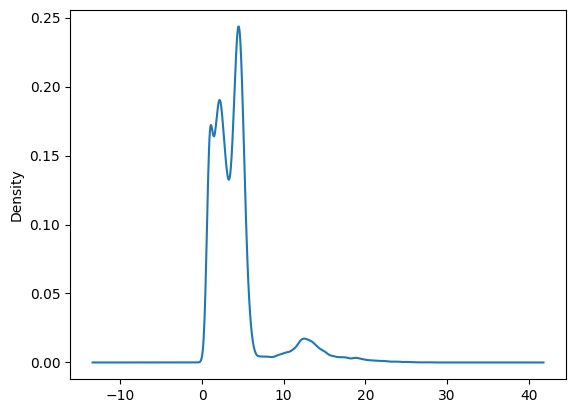

In [63]:
survey_df_pandas.weight.plot.kde(backend="matplotlib", bw_method=0.3)